In [84]:
import pandas as pd
import yfinance as yf #vamos a usar yfinance para extaer informacion sobre stocks
import matplotlib as mat
import requests as rq
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np

Question 3: Use yfinance to Extract Stock Data

In [85]:
gme = yf.Ticker('GME')

In [86]:
gme_data = gme.history(period='max')
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-26 00:00:00-04:00,22.400000,22.639999,21.870001,22.290001,5777500,0.0,0.0
2024-09-27 00:00:00-04:00,22.389999,23.100000,21.969999,22.480000,7416500,0.0,0.0
2024-09-30 00:00:00-04:00,22.299999,23.639999,22.170000,22.930000,10161700,0.0,0.0


In [138]:
gme_data_reset = gme_data.reset_index()
gme_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

In [88]:
url_gme = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [89]:
html_gme = rq.get(url_gme).text

In [90]:
soup_gme = bs(html_gme, 'html.parser')
soup_gme

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [91]:
gme_table = soup_gme.find_all('table')
gme_table

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$6,466</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$8,285</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$8,547</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$7,965</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$9,364</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$9,296</td>
 </tr>
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$9,040</td>
 </tr>
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-align:center">$8,887</td>
 </tr>
 <tr>


In [141]:
gme_tables = gme_table[1]
gme_tables

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>


In [140]:
gme_revenue = soup_gme.find('tbody')
print(gme_revenue)

<tbody>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$6,466</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$8,285</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$8,547</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$7,965</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$9,364</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$9,296</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$9,040</td>
</tr>
<tr>
<td style="text-align:center">2013</td>
<td style="text-align:center">$8,887</td>
</tr>
<tr>
<td style="text-align:center">2012</td>
<td style="text-align:center">$9,551</td>
</tr>
<tr>
<td style="text-align:center">2011</td>
<td style="text-align:center">$9,474</td>
</tr>
<tr>
<td style="text-align:center">2010</td>
<td style="text-a

In [94]:
gme_df = pd.DataFrame(columns=['Date','Revenue'])
gme_df

,Date,Revenue


In [143]:
dates = []
revenues = []

# Extraer las filas del HTML
for row in gme_tables.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) == 2:
        dates.append(columns[0].text.strip())
        revenues.append(columns[1].text.strip())

# Crear el DataFrame final
gme_df2 = pd.DataFrame({'Date': dates, 'Revenue': revenues})


In [144]:
gme_df2

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [145]:
gme_df2['Revenue'] = gme_df2['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
gme_df2

,Date,Revenue
0,2020-04-30,1021.0
1,2020-01-31,2194.0
2,2019-10-31,1439.0
3,2019-07-31,1286.0
4,2019-04-30,1548.0
...,...,...
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0


In [149]:
gme_df2.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


Question 6: Plot GameStop Stock Graph

In [98]:
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-26 00:00:00-04:00,22.400000,22.639999,21.870001,22.290001,5777500,0.0,0.0
2024-09-27 00:00:00-04:00,22.389999,23.100000,21.969999,22.480000,7416500,0.0,0.0
2024-09-30 00:00:00-04:00,22.299999,23.639999,22.170000,22.930000,10161700,0.0,0.0


In [99]:
gme_limited = gme.history(start='2002-02-13', end='2021-07-01')
gme_limited

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-24 00:00:00-04:00,55.290001,56.862499,52.900002,53.077499,15453200,0.0,0.0
2021-06-25 00:00:00-04:00,53.500000,53.549999,49.625000,52.377499,50770800,0.0,0.0
2021-06-28 00:00:00-04:00,52.812500,56.112499,52.549999,53.312500,19517600,0.0,0.0


In [100]:
gme_limited_reset = gme_limited.reset_index()
gme_data_reset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5693,2024-09-26 00:00:00-04:00,22.400000,22.639999,21.870001,22.290001,5777500,0.0,0.0
5694,2024-09-27 00:00:00-04:00,22.389999,23.100000,21.969999,22.480000,7416500,0.0,0.0
5695,2024-09-30 00:00:00-04:00,22.299999,23.639999,22.170000,22.930000,10161700,0.0,0.0
5696,2024-10-01 00:00:00-04:00,22.950001,23.120001,21.809999,21.969999,7189200,0.0,0.0


In [146]:
def deff(tesla_data,title):
    plt.figure(figsize=(12,6))
    plt.plot(tesla_data['Date'], tesla_data['Close'], color = 'blue',linestyle='-', linewidth=1, markersize=10)
    plt.title(f'{title} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    plt.show()

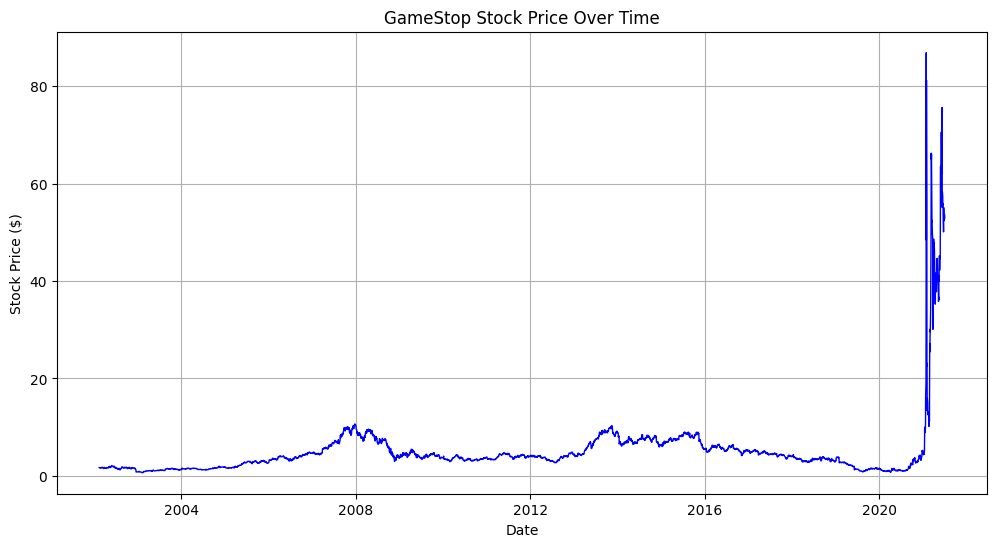

In [102]:
deff(gme_limited_reset,'GameStop')

In [147]:
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    gme_limited_reset['Date'] = pd.to_datetime(gme_limited_reset['Date'], utc=True).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    stock_data = stock_data.sort_values('Date')
    revenue_data = revenue_data.sort_values('Date')


    # Gráfico de la cotización de acciones
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price',linewidth=1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Stock Price ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Crear un segundo eje para graficar los ingresos
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'],color = 'orange' , label='Revenue', linewidth = 2, marker='o')
    ax2.set_ylabel('Revenue ($ in Millions)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Añadir título
    plt.title(f'{stock_name} Stock Price and Revenue Over Time')

    # Mostrar la gráfica
    plt.show()

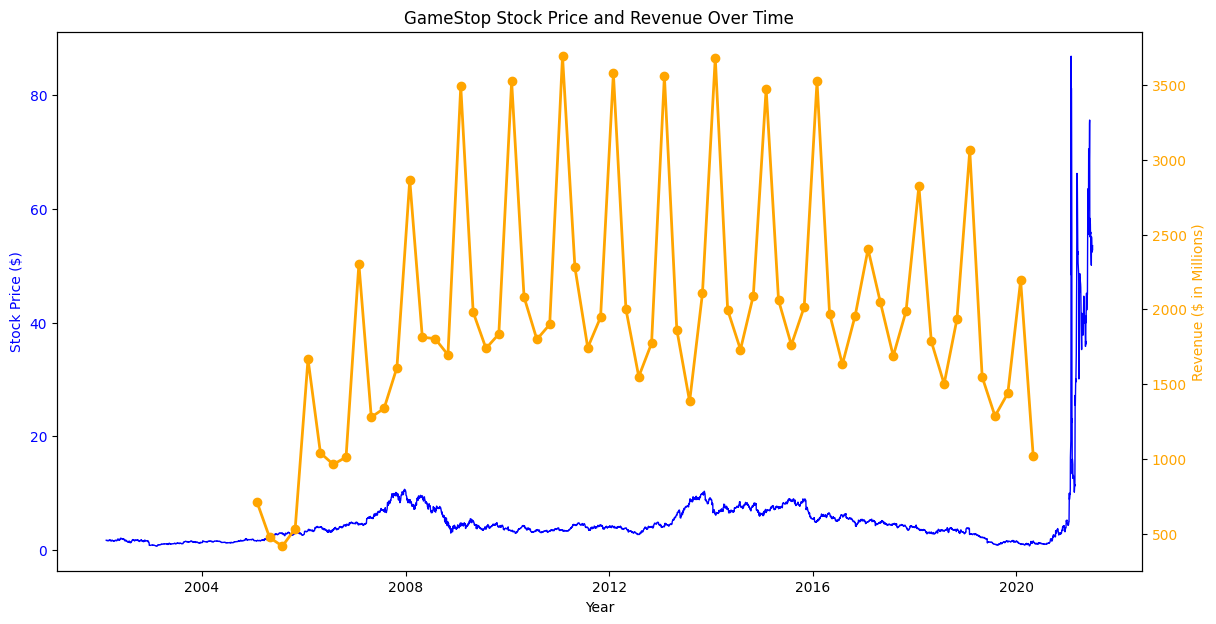

In [148]:
make_graph(gme_limited_reset, gme_df2, 'GameStop' )